### Support Vector Machine

### Notes and Things to Remember

+ Support Vector Machines classify data by splitting them into two groups based on a hyperplane. The goal is to add a maximized margin to either side of the hyperplane. Any data point that results in a positive number will be classified as the positive class and a negative value will be classified as a negative class.
+ A support vector is any instance that is on the street/within the margin and this margin/decision boundary is determined entirely by them.
+ Computing predictions only involves the support vectors, all other points above and below the margin has no affect on the decision boundary
+ They are sensitive to feature scales so make sure you scale them first
+ For the regularization term **C**, high values put more penalty on misclassification which will shrink the margin which can lead to overfitting (less regularization), and low values allow wider margin and more missclassifications (more regularization and potential underfitting)
+ The soft margin function is a trade off between maximizing the margin and minimizing the error
+ Epsilon is the slack variable which is a distance measure of the data points to their corresponding margin. Epsilon will be 0 for correctly classified points outside of their margin but on the correct side, greater than 1 for misclassifications, and between 0-1 for data within the margin but on the correct side of the hyperplane. 
+ The distance between the upper and lower sides of the street/margin is 2.
+ w is the vector that holds the coefficients of the hyperplane 
+ x are the variable values
+ b is the bias term
+ A prediction greater than 1 will result in the positive class, less than -1 will be the negative class. A number between 0 and 1 indicates positive class but within the correct side of the street and between 0 and -1 are negative class that lie within the street
+ Best used for small or medium sized datasets
+ Hard margin only works for linearly seperable data and is very sensitive to outliers
+ SVM does not output probabilities for each class but it does output the distance between the test instance and the decision boundary that can be used as a confidence score. If we set **probability=True** in scikit learn the probabilities are found with Logistic Regression on the SVM scores on five fold cross validation. This adds predict_proba() and predict_log_proba() methods. 
+ When using SVC(kernel = 'poly") if the model is overfitting, reduce the degree. If it is underfitting, increase it. 
+ coef0 is the same thing as r in the kernel trick function
+ for RBF the gamma value indicates the influence of instances. Large values means each instances range of influence is smaller and a small gamma value means instances have a larger range of influence. 
+ if the model is overfitting, reduce gamma. If it is underfitting, increase it (similar to C)
+ gamma sort of acts like nearest neighbors and when gamma is high the influence is smaller sort of like decreasing the number of neighbors. So if the model is underfitting we may be using too many neighbors and want to restric the influence of far away data points so we increase gamma. Likewise, a small gamma kind of represents using many neighbors as influence so this model is simpler. 
+ string kernels are rare but can be used for classifying text documents
+ As a rule of thumb, always try LinearSVC first (especially if the training set is large or has many features), then try Gaussian RBF kernel then poly kernel. Use cross validation. 
+ can also be used for regression
+ When using for regression the trick is to reverse the objective so we try to fit as many instances possible on the street while limiting margin violations which are instances off the street. The width of the street is controlled by the hyperparameter epsilon. The larger the value, the larger the margin. 
+ SVMs can be used for outlier detection 
+ minimizing ||W|| effectively reduces the slope of the hyperplane


In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('../data/data.txt', sep=',')

In [77]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [78]:
# fix churn target variable
df = df.rename(columns={'Churn?': 'Churn'})

In [79]:
# map False. to 0 and True to 1
df['Churn'] = df['Churn'].replace({'False.': 0, 'True.': 1})

C:\Users\ryans\AppData\Local\Temp\ipykernel_41564\3099417857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'False.': 0, 'True.': 1})


In [80]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [82]:
# just use international plan and voicemail plan like with naive bayes
data = df[["Int'l Plan", 'VMail Plan', 'Day Mins', 'Eve Mins', 'Churn']]

In [83]:
data.head()

,Int'l Plan,VMail Plan,Day Mins,Eve Mins,Churn
0,no,yes,265.1,197.4,0
1,no,yes,161.6,195.5,0
2,no,no,243.4,121.2,0
3,yes,no,299.4,61.9,0
4,yes,no,166.7,148.3,0


<Axes: title={'center': 'Target Variable'}, xlabel='Churn'>

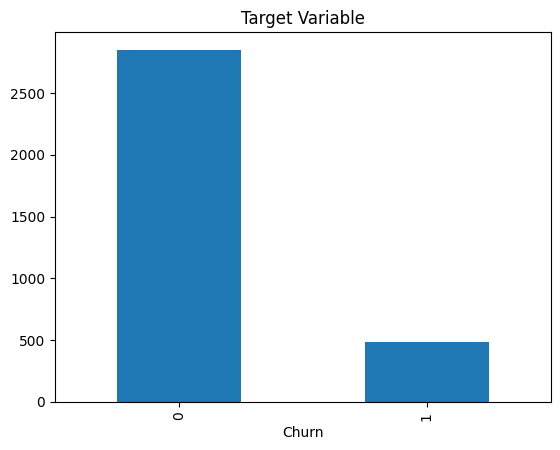

In [84]:
import matplotlib.pyplot as plt
data['Churn'].value_counts().plot(kind='bar', title='Target Variable')

#### Things to Do

+ combine day and night mins as "mins"
+ standardize mins
+ balance the data
+ encode the categorical variables
+ train/test split
+ create model
+ evaluate
+ cross val/grid search
+ re-eval

In [85]:
# combine day and night minutes as minutes
data['mins'] = data['Day Mins'] + data['Eve Mins']
data.head()

C:\Users\ryans\AppData\Local\Temp\ipykernel_41564\3461157753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mins'] = data['Day Mins'] + data['Eve Mins']


,Int'l Plan,VMail Plan,Day Mins,Eve Mins,Churn,mins
0,no,yes,265.1,197.4,0,462.5
1,no,yes,161.6,195.5,0,357.1
2,no,no,243.4,121.2,0,364.6
3,yes,no,299.4,61.9,0,361.3
4,yes,no,166.7,148.3,0,315.0


In [86]:
# remove Day Mins and Eve Mins
data.drop(['Day Mins', 'Eve Mins'], axis=1, inplace=True)

C:\Users\ryans\AppData\Local\Temp\ipykernel_41564\220765987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Day Mins', 'Eve Mins'], axis=1, inplace=True)


In [87]:
data.head()

,Int'l Plan,VMail Plan,Churn,mins
0,no,yes,0,462.5
1,no,yes,0,357.1
2,no,no,0,364.6
3,yes,no,0,361.3
4,yes,no,0,315.0


In [88]:
# reorder the data
data = data[["Int'l Plan", 'VMail Plan', 'mins', 'Churn']]

In [89]:
data.head()

,Int'l Plan,VMail Plan,mins,Churn
0,no,yes,462.5,0
1,no,yes,357.1,0
2,no,no,364.6,0
3,yes,no,361.3,0
4,yes,no,315.0,0


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# pipeline for minutes
num_pipeline_col = ['mins']

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# pipeline for plans
cat_pipeline_cols = ["Int'l Plan", 'VMail Plan']

cat_pipeline = Pipeline([
    ('cat', OneHotEncoder())
])

# column transformer
transformer = ColumnTransformer([
    ('numeric_transformer', num_pipeline, num_pipeline_col),
    ('categoric_transformer', cat_pipeline, cat_pipeline_cols)
])





In [117]:
# view transformer
transformer

ColumnTransformer(transformers=[('numeric_transformer',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['mins']),
                                ('categoric_transformer',
                                 Pipeline(steps=[('cat', OneHotEncoder())]),
                                 ["Int'l Plan", 'VMail Plan'])])

In [118]:
# create feature and target variables
X = data.drop('Churn', axis= 1)
y = data['Churn']

In [119]:
# try LinearSVC first because it is faster than SVC(kernel = "linear")
from sklearn.svm import LinearSVC
# add the SVM model to our pipeline
model_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', LinearSVC(loss='hinge', random_state=42))
])

In [120]:
# view model pipeline
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['mins']),
                                                 ('categoric_transformer',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  ["Int'l Plan",
                                                   'VMail Plan'])])),
                ('model', LinearSVC(loss='hinge', random_state=42))])

In [121]:
# train test split
from sklearn.model_selection import train_test_split

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [122]:
X_train

,Int'l Plan,VMail Plan,mins
817,no,no,259.2
1373,no,no,305.7
679,yes,no,549.4
56,no,no,306.9
1993,no,no,482.6
...,...,...,...
1095,no,no,473.0
1130,no,no,215.9
1294,no,no,349.6
860,no,no,354.4


In [123]:
# fit the model to training data using the pipeline
model = model_pipeline.fit(X_train, y_train)

In [125]:
model.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_transformer',
                                    Pipeline(steps=[('std_scaler',
                                                     StandardScaler())]),
                                    ['mins']),
                                   ('categoric_transformer',
                                    Pipeline(steps=[('cat', OneHotEncoder())]),
                                    ["Int'l Plan", 'VMail Plan'])])),
  ('model', LinearSVC(loss='hinge', random_state=42))],
 'transform_input': None,
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('numeric_transformer',
                                  Pipeline(steps=[('std_scaler',
                                                   StandardScaler())]),
                                  ['mins']),
                                 ('categoric_transformer',
                                  Pipeline(steps=[('cat', OneHotEncoder())]),
  